## <font color=green>Day-6</font>

- Our topic of discussion is <font color=green size="4">**Linear Discriminant Analysis For Classification **PART-2****</font>
- Dataset That we would be using : iris
    - The Dataset has already been downloaded and is placed in the folder ./Dataset/Classification/
    - Incase if you face any problems, you can download that dataset from kaggle using the link https://www.kaggle.com/datasets/uciml/iris/download?datasetVersionNumber=2
    
- Sections
    0. **Learning Contents about Linear Discriminant Analysis**
    1. Importing Headers
    2. Importing Data
    3. Data Exploration
    4. Data Encoding
    5. EDA
    6. Data Preparation
    7. Dimentionality Reduction : LDA
    8. Visualization
    9. Modelling
    10. Model Evaluation

### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

## Learning : Linear Discriminant Analysis

- There are few best Video Explanations and blogs about what naive bayes algorithm is and how it can be used for classification. I dont want to replicate the content instead il'l arrange the content in a sequential manner and highight the topics to give attention to in the respective link


1. What is Linear Discriminant Analysis : [Link](https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/) 
2. Types of Linear Discriminant Analysis and how to use them : [Link](https://towardsdatascience.com/linear-discriminant-analysis-explained-f88be6c1e00b#:~:text=Linear%20and%20quadratic%20discriminant%20analysis)
3. Linear Discriminant Analysis - Video Explanation : 
<video controls src="./Data/Linear Discriminant Analysis.mp4" style="width:500px;text-align: center;margin-left:200px;display:block;" />
4. A very Detailed Blog about LDA : [Link](https://www.knowledgehut.com/blog/data-science/linear-discriminant-analysis-for-machine-learning)
5. **LDA is a Generative model not discriminative model** 
<img src="./Data/LDA.png" style="width:500px;text-align: center;margin-left:200px;display:block;" />
5. Assumptions of LDA : [Link](https://www.knowledgehut.com/blog/data-science/linear-discriminant-analysis-for-machine-learning#:~:text=The%20assumptions%20made,the%20same%20variance.)
6. Extension of LDA : [Link](https://www.knowledgehut.com/blog/data-science/linear-discriminant-analysis-for-machine-learning#:~:text=What%20are%20the%20extensions,estimate%20of%20the%20covariance.)

6. [Harvard Notes](https://harvard-iacs.github.io/2018-CS109A/lectures/lecture-14/presentation/lecture14_discriminant_analysis.pdf)
7. [Quadratic Discriminant Analysis](https://towardsdatascience.com/quadratic-discriminant-analysis-ae55d8a8148a) explanation and Code

## 1. Importing Headers

In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Encoders
from sklearn.preprocessing import LabelEncoder

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score, confusion_matrix

## 2. Importing Data


In [2]:
df = pd.read_csv("./Dataset/Classification/Iris.csv")
print("The dataset has {0} rows and {1} features".format(len(df),len(df.columns)))
df.head(5)

The dataset has 150 rows and 6 features


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### <font color=green>Inferences</font>
- We have 150 rows and 6 features
- Our Target Feature is "Species"
- Our Target Variable is in Categorical Format. We need to Enocode it appropriately

## 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

### <font color=green>Inferences</font>
- There are lot many unique values in each feature
- We need to apply Gaussian Naive bayes assuming the data is almost like continuos
- There are 3 types of Species in our target varible
- The values of "Species" are categorical values which we have to encode in further steps

## 4. Data Encoding

In [7]:
label_encoder  = LabelEncoder()
data = label_encoder.fit_transform(df["Species"])

# Tranformed Data
df_transformed = df.drop(["Species"],axis=1)
df_transformed["Species"] = data

## 5. EDA

In [8]:
df_transformed.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


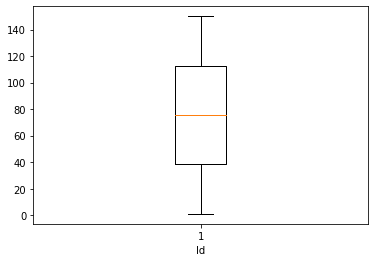

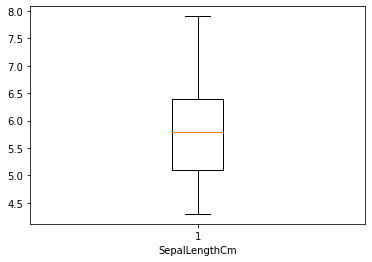

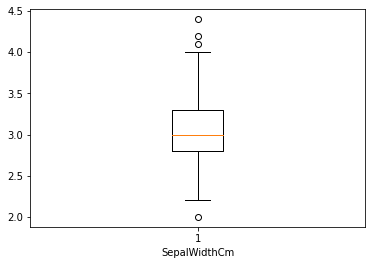

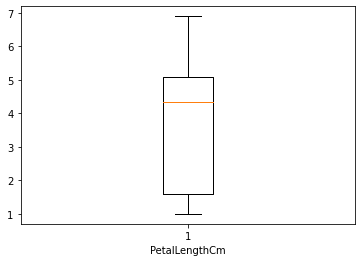

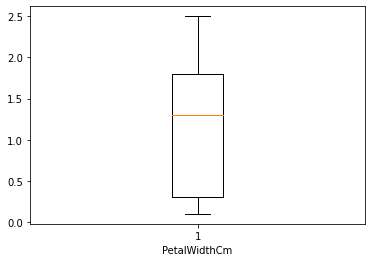

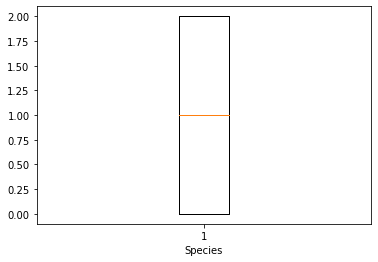

In [9]:
# Box plots for finding Outliers
for field in df_transformed.columns:
    plt.figure()
    plt.boxplot(df_transformed[field])
    plt.xlabel(field)

### <font color=green>Inferences</font>
- Box plots shows that there are Few outliers in "SepalWidthCm" but they seem to not that significant 

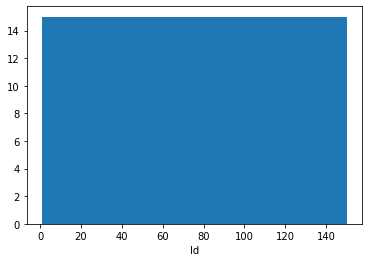

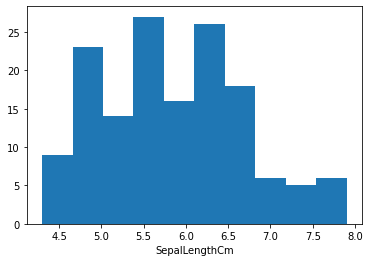

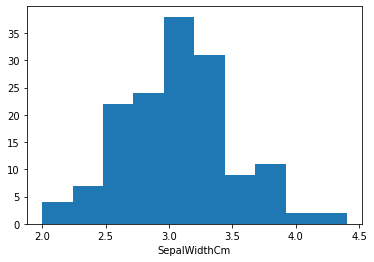

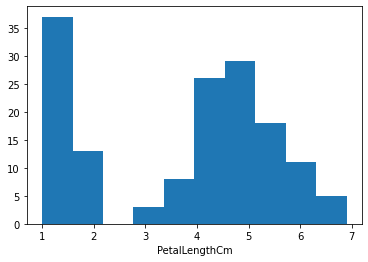

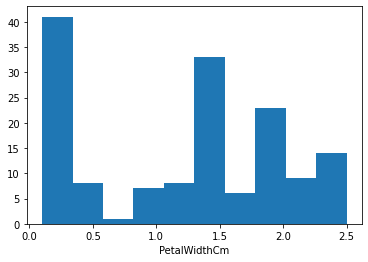

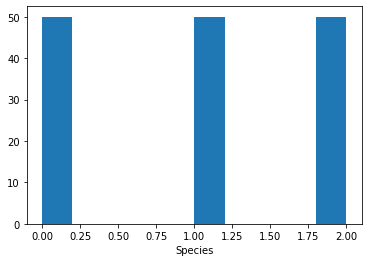

In [10]:
for field in df_transformed.columns:
    plt.figure()
    plt.hist(df_transformed[field])
    plt.xlabel(field)
    plt.show()

### <font color=green>Inferences</font>
- All features are balanced except for class feature.
- It's important to take a bananced sample input for training purposed and not a biased one

<AxesSubplot:>

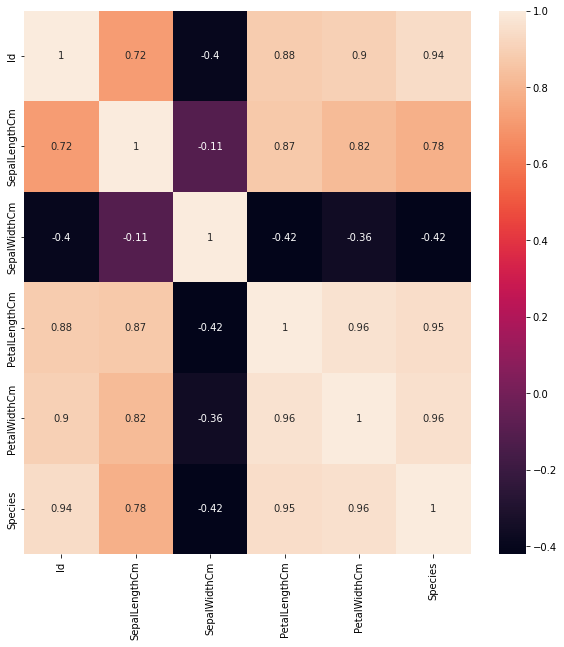

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_transformed.corr(),annot=True)

### <font color=green>Inferences</font>
- Few of the features like "PetallengthCm" and "PetalWidthCm" are highly correalted
- For implemtation purposes lets leave this fact and implement Guassian Naive Bayes Algorithm

## 6. Data Preparation

In [12]:
# Data Preparation
X = df_transformed.drop("Species", axis = 1)
Y = df_transformed["Species"]

train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.33, random_state = 42, stratify=Y)
# Note : We have used startify inorder to avoid bais between traiing set and testing set distribution
print(X.shape, Y.shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(150, 5) (150,) (100, 5) (50, 5) (100,) (50,)


## 7. Dimentionality Reduction : LDA

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
train_x = lda.fit_transform(train_x, train_y)
test_x = lda.transform(test_x)

## 8. Visualization

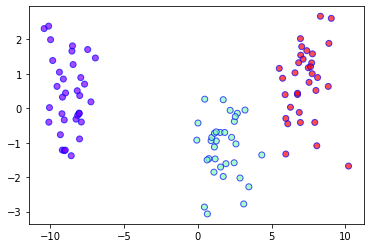

In [14]:
# plot the scatterplot
plt.scatter(
    train_x[:,0],train_x[:,1],c = train_y,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

## 9. Modelling

In [15]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(train_x, train_y)

RandomForestClassifier(max_depth=2, random_state=0)

## 10. Model Evaluation

In [16]:
pred_test = model.predict(test_x)
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))

Testing-set accuracy score: 0.9200


In [17]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.84      0.94      0.89        17
           2       0.93      0.82      0.87        17

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



In [18]:
conf_m = confusion_matrix(test_y, pred_test)
print(conf_m)

[[16  0  0]
 [ 0 16  1]
 [ 0  3 14]]


### <font color=green>Conclusion</font>
- Linear Discriminant Analysis with Random Forest Classifier has been successfully applied on iris dataset
- NoteWorthy Results
    - Accuracy of Random Forest Classifier with Linear Discriminant Analysis: **0.9200**

<img src="./Data/thank.jpg"/>
---------------------------------------------------------------------------------------- END OF NOTEBOOK -------------------------------------------------------------------------------------